# Correlation

Using cross- and autocorrelation to deconvolve.

Resources:
- Proakis 1996 Digital Signal Processing p. 365

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

import scipy.signal

In [2]:
INPUT_FILE = "data/martin_dcx1re_c414_left_pickup_right.wav"

In [3]:
data, sample_rate_Hz = sf.read(INPUT_FILE)
ydata, xdata = data.T

## Naive deconvolution

In [4]:
w = np.blackman(len(xdata))
X = np.fft.fft(w * xdata, 2048)
Y = np.fft.fft(w * ydata, 2048)
H = Y/X

In [5]:
def freqresp(H, fig=None, ax=None):
    f = np.linspace(0, sample_rate_Hz, len(H))
    end = len(f)//2
    f_ = f[0:end]
    H_ = 20*np.log10(np.abs(H[0:end]))
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        
    ax.semilogx(f_, H_)
    ax.grid()
    fig.tight_layout()
    return fig, ax

pass

## Deconvolution using correlation

In [6]:
ryx = scipy.signal.correlate(ydata, xdata, mode="full", method="fft")
rxx = scipy.signal.correlate(xdata, xdata, mode="full", method="fft")

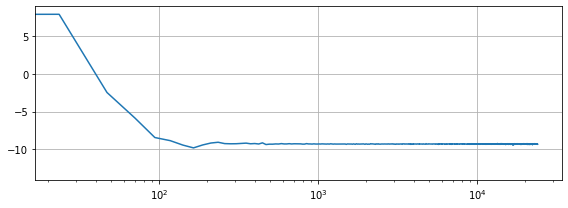

In [7]:
L = 2048
Syx = np.fft.fft(ryx, L)
Sxx = np.fft.fft(rxx, L)
H = Syx/Sxx

freqresp(H)
pass

## Impulse response

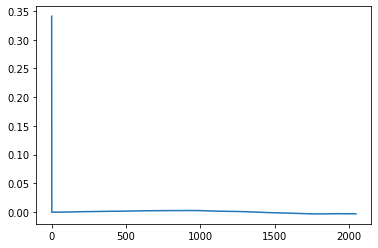

In [8]:
h = np.real(np.fft.ifft(H))
plt.plot(h)
# sf.write(f"ir_{int(time.time())}.wav", h, samplerate=sample_rate_Hz)

## Conclusion

This does not look correct. There is almost no frequency-dependency except at DC.